In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from catboost import CatBoostClassifier, Pool
import xgboost as xgb
import pickle
from datetime import datetime

### Build a model to predict proudct re-order as wellas Products Recommendation for next purchase  

source code, data analysis, and modeling and predictions can be accessed via links 

Data Wrangling - Exploratory Data Analysis - Model/Predictions

### Business Problem :

Ordering food supplies online is a new way fo restocking groceries and other essential items. But what happens when  you forget few items while adding items to the cart or wnat to get good suggestions on your itmes? What if company does not stock the products which is most ordered by users? To resolve these issues, Model needs to  be build can show highest probability of reordering items as well as suggest product users for their next shopping.

Instacart, a grocery order and the delivery app with over 500 million products and 40000 stores serves across U.S. & Canada. Instacart profices a user expericne where you will get product recommendation based on your previous orders.
Instacart prodived us with transactions dta of customer orders over time to predict which previously purchased products will be in a user's next order. This dat is open-sourced and given as Kaggle challenge

### Business Objective  

The objective is to predict which products will be in user's next order and recommend list of products to user based on his  past N orders

### Dataset

 - Prior Data : order history of every user. This data contains nearly 4 - 100 past orders per user
 - Train Data : Current order data of every user. 
 - Test Data: Fugure order data of every user. We need to predict products
 
 

orders (3.4m rows, 206k users):

    order_id: order identifier
    user_id: customer identifier
    eval_set: which evaluation set this order belongs in (see SET described below)
    order_number: the order sequence number for this user (1 = first, n = nth)
    order_dow: the day of the week the order was placed on
    order_hour_of_day: the hour of the day the order was placed on
    days_since_prior: days since the last order, capped at 30 (with NAs for order_number = 1)

products (50k rows):

    product_id: product identifier
    product_name: name of the product
    aisle_id: foreign key
    department_id: foreign key

aisles (134 rows):

    aisle_id: aisle identifier
    aisle: the name of the aisle

deptartments (21 rows):

    department_id: department identifier
    department: the name of the department

order_products__SET (30m+ rows):

    order_id: foreign key
    product_id: foreign key
    add_to_cart_order: order in which each product was added to cart
    reordered: 1 if this product has been ordered by this user in the past, 0 otherwise

where SET is one of the four following evaluation sets (eval_set in orders):

    "prior": orders prior to that users most recent order (~3.2m orders)
    "train": training data supplied to participants (~131k orders)
    "test": test data reserved for machine learning competitions (~75k orders)


 
### Overview

In our analysis we were able to:
    * Look at distribution of orders in a day
    * Look at distribution of orders in a week
    * Most and Least ordered, reordred items
    * Order in which users places items in cart
    * Most ordered items per department
    
We have found that:
    * 
    

We built 2 different models for recommending products, 
   * Random Forest Classifier 
   * KNearest N eighbors Classifier




### Data Analysis

###### Missing values

The data set has no missing values except for days_since_prior_order
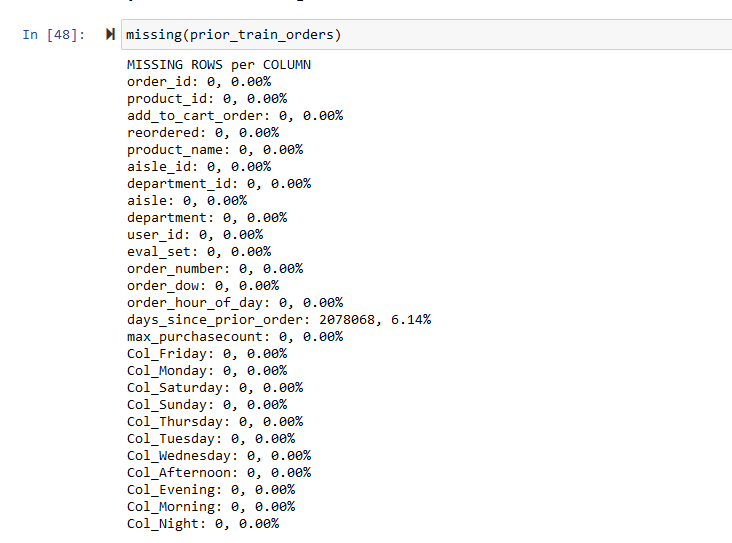


###### Distribution of Target variable 

prior set :
Train set :

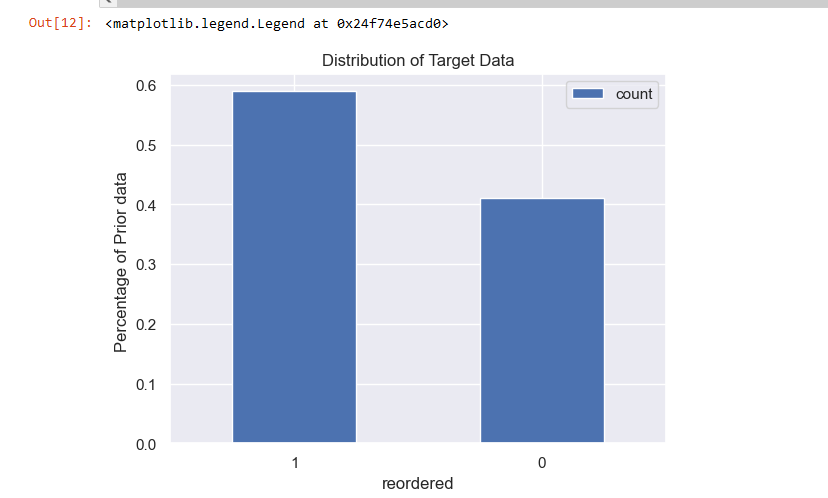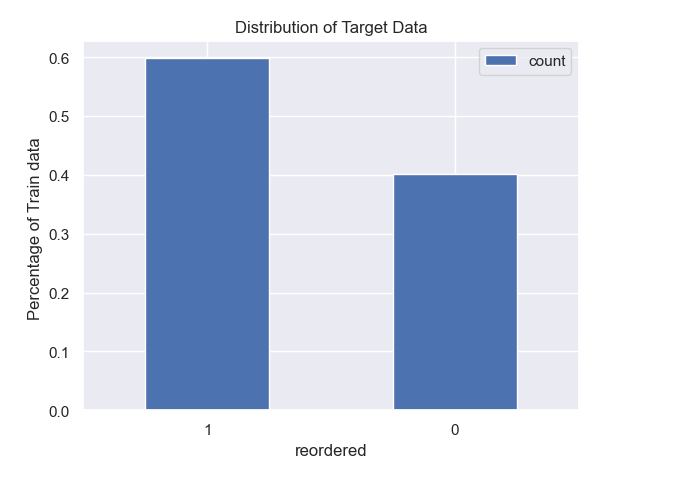
Looks like both prior as well as Train set has similar distribution of Target data


For every user we have around 3 - 99 orders in prior and test set included. Also around 64% percent of users are repeating customers! 

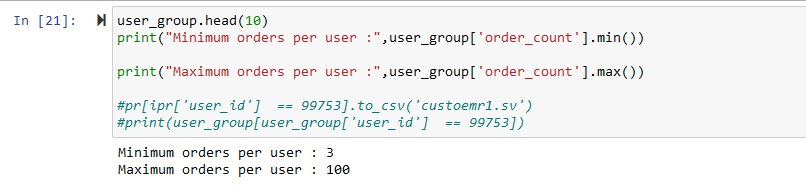
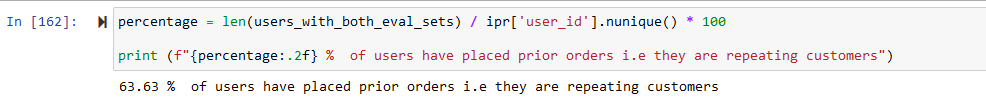

**Let explore the products:**
       * Which products are ordered the most
       * which Products are re-ordred the most

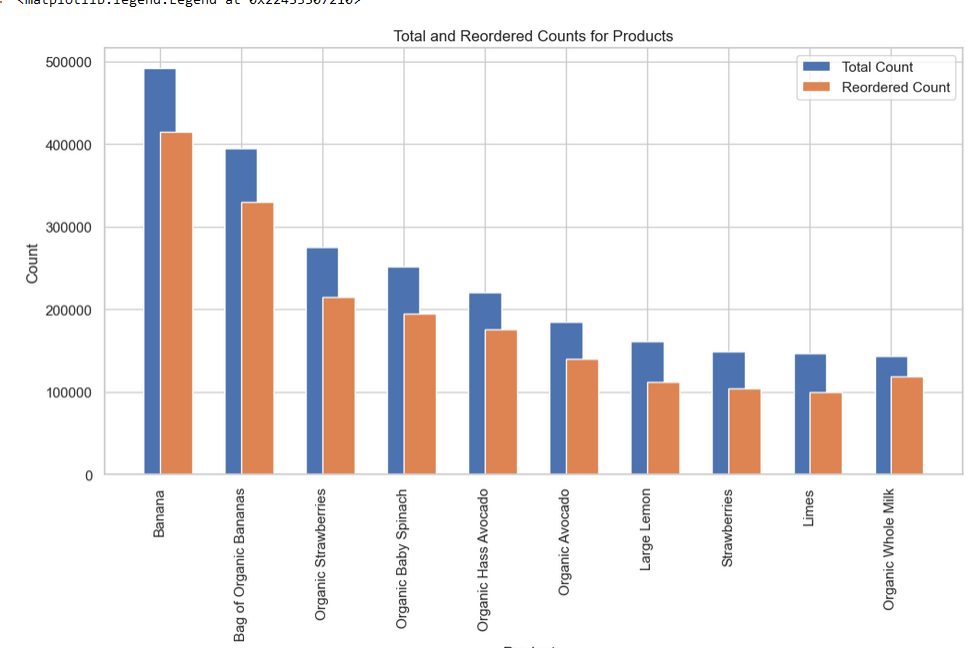

Banans and Strawberries stands  tops in the both the category. It can also be seen that most of the products whicha ordred are organic foos/ fresh fruits. Interesting organic products tops in both ordering as well as reordering.


With given dow - 0- as sunday, Customers order the most in the beginning of the week. Good way to start the week with grocery items purchase !! 

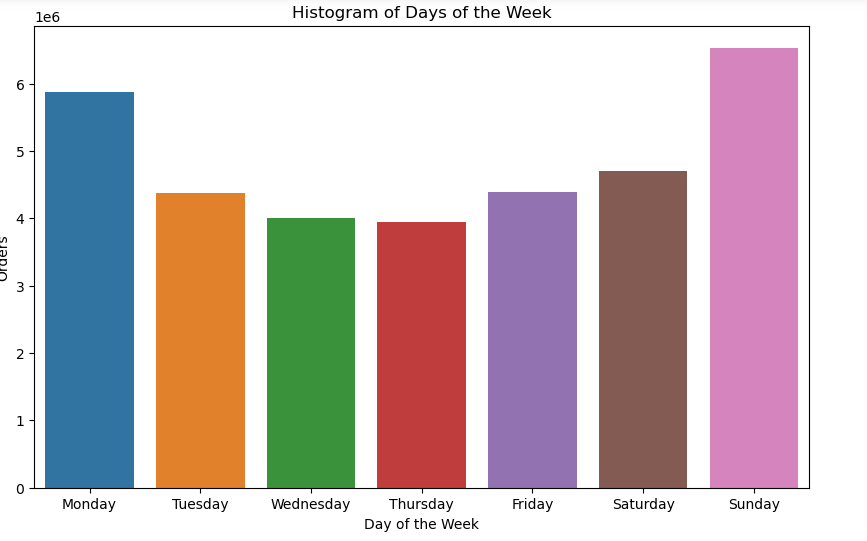

Also by dividing the day into 4 different slots, the majority of orders are concentrated during the day, with the fewest orders occurring in the early hours of the day.
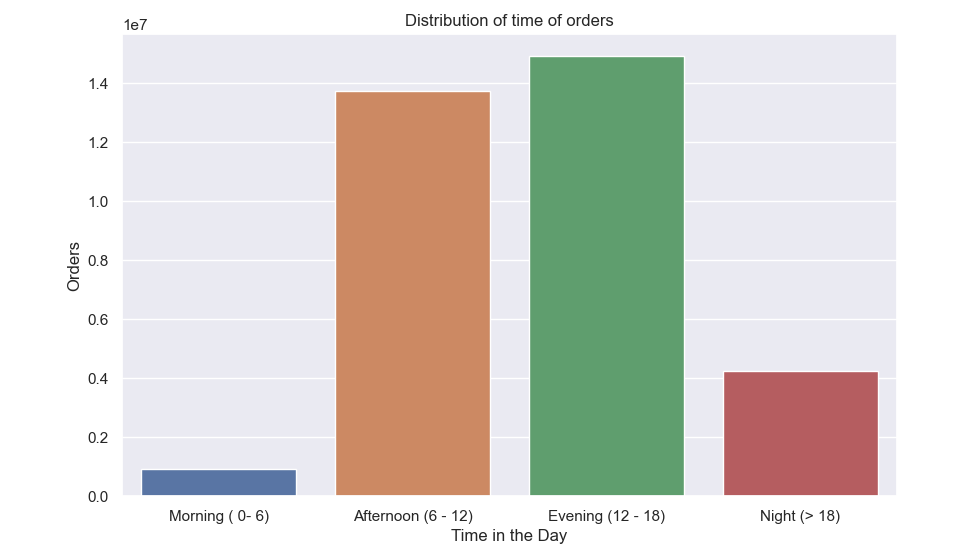


Looks like customers order once in a every week (check the peak) or once in a month (peak at 30 days). We could also see smaller peaks at 14,21, and 28 days (weekly intervels). In case of reorders 7th and 30th day peaks. Also they are 2000+ products which has been re-ordered only one time 
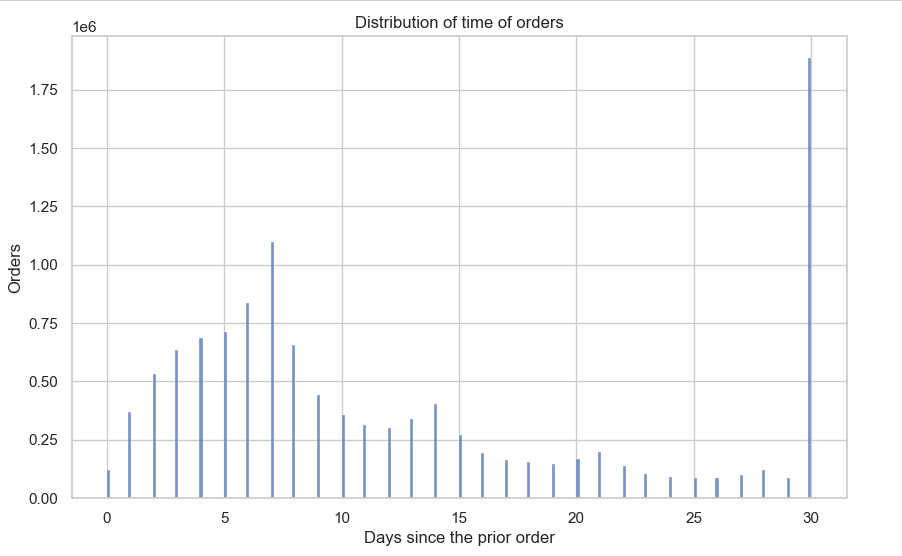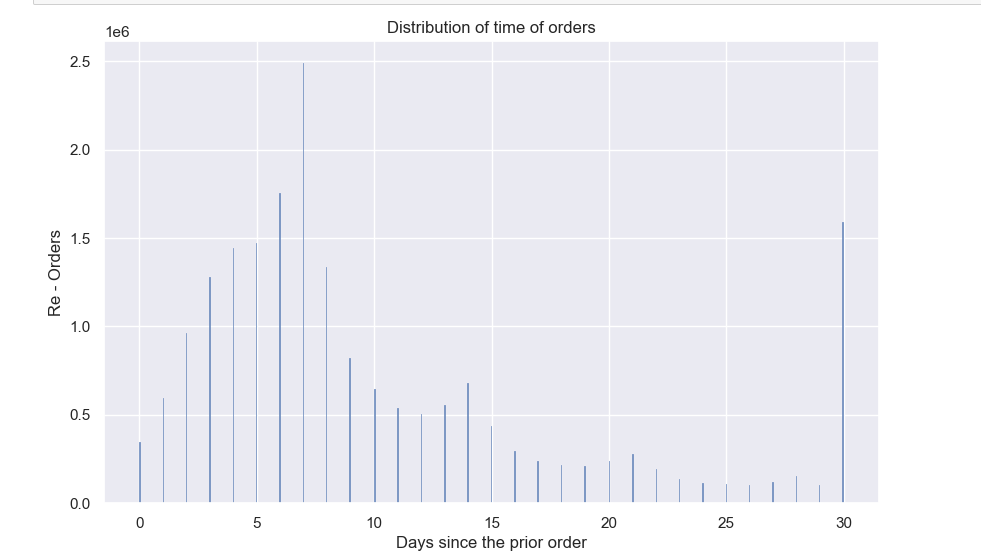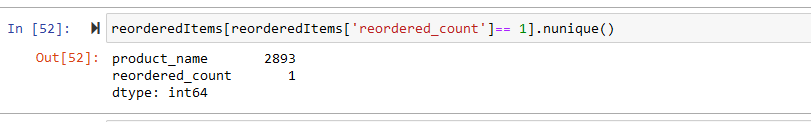

When we look at department wise, produce section has major share of orders, followed by dairy, and snacks
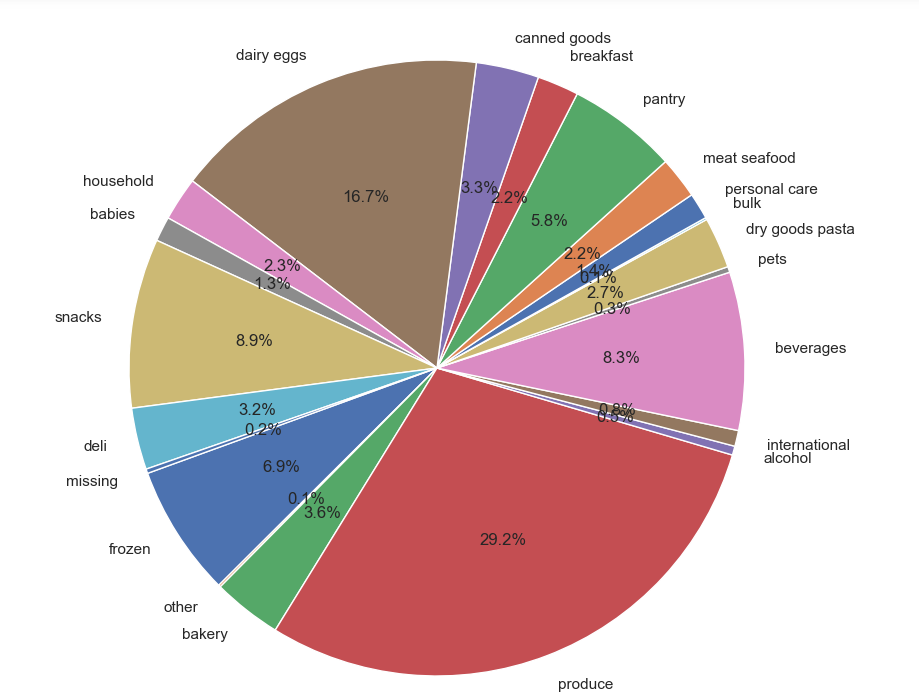

### Feature Building - Random Forest Classifer

Humans have an ability, leaps ahead of that of a machine, to find complexe patterns or relations, so much so that se can seem them even when they dont exist.When data is presented efficiently could mean much more than that given randomly. Here in this project, I opted for Discretization of feature engineering. In this method we are taking set of data values and grouping sets of them together on based users.

**Generate Training Data**  ==> using prior order and train order data 
**Generate Test Data** ==> using training data .i.e. eval_set == 'test'

Using Model we want to predict whether User A will buy Product B.

For Product Feature:

   
  * _feat_1 : product reorder rate : How frequently the product was reordered? 
  * _feat_2 : average_pos_in cart: Average position of product in the cart 
  * _feat_3 : Colulmn 1 from NMF Output
  * _feat_4 : Colulmn 2 from NMF Output
  * _feat_5 : Colulmn 3 from NMF Output
       * NMF is calculated based on department ids, aisle ids
  * _feat_6 : aisle_reorder_rate: How frequently a product is oreordred from the aisle to which this product belongs
  * _feat_7 : departmnet_reorder_rate
  * _dept : divider data based on department / aisle types
   
   
 **Generate User Features**
 
    * Average reorder rate on orders placed
    * Distinct Products ordered
    * Total Products ordered
    * Average cart size
    * user product reorder ratio
    * Average days between orders
    
    
 **Generate User Product Features**
   
    * How frequently user ordered the product?
    * How frequently user reordered the product ?
    * Average position of proudct in the card on order
    * Number of orders placed since product was last ordered
    * Number of orders where user continuously brought a prodct without miss
    
 **Additional Features**
 
    * features based order hour of day
    * features based on day of week
    * features based on prior order
    
    

### KMeans Cluster Algorithm

RFM : analysis is a technique used in marketing and customer relationship managment to segmetn and analyse custoemrs based on their past behaviors. 
   * Recency - Calcualte the time since customer's last purchase i.e. days since last order
   * Frequency - Count Number of transactions or interanctions a customer has had with your business over specific time 
      frame
   * Monetary : Calculate the total amount of money spent by each customer 
   
   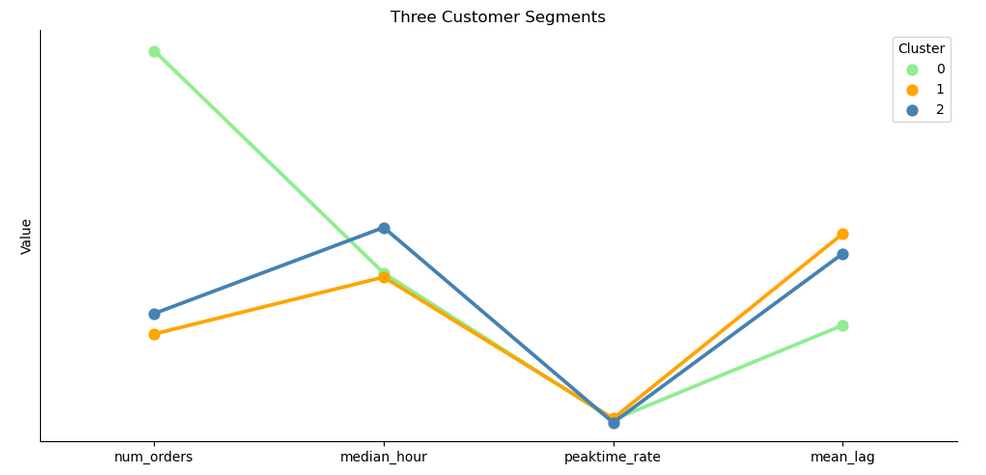
   
   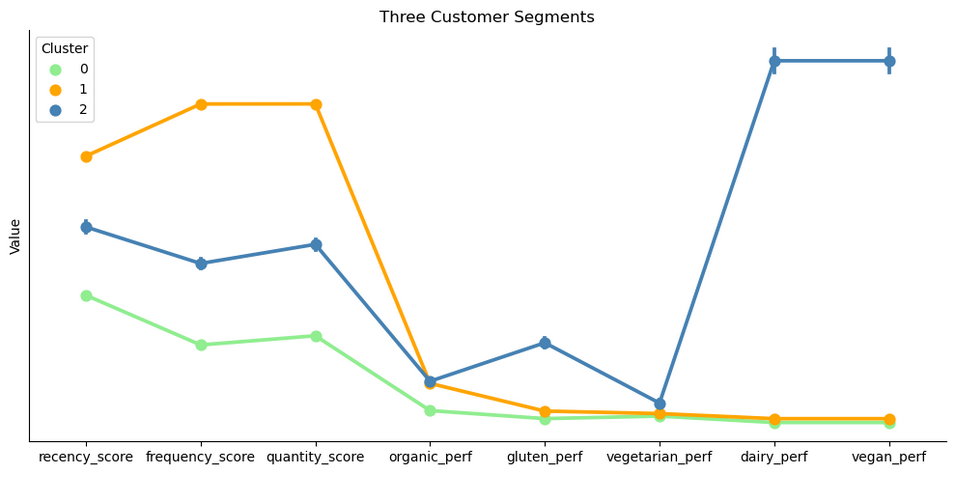

### Generate Training Data and Test Data

To the given Training and Test data set, custom features that were built based on products, user behaviors are merged and data set is ready for Training the Model.

### Training Models based on Random Forest Classifier

using RandomizedSearchCv best parameters for the classifier is determined as well as feature importance are determined. 

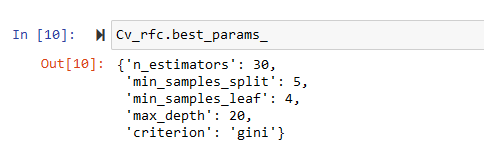

**Feature Importance :**
   
   * Number of orders placed since product was last ordered - u_p_orders_since_last holds highest among the feature 
        importance
   * frequency of product being ordered 
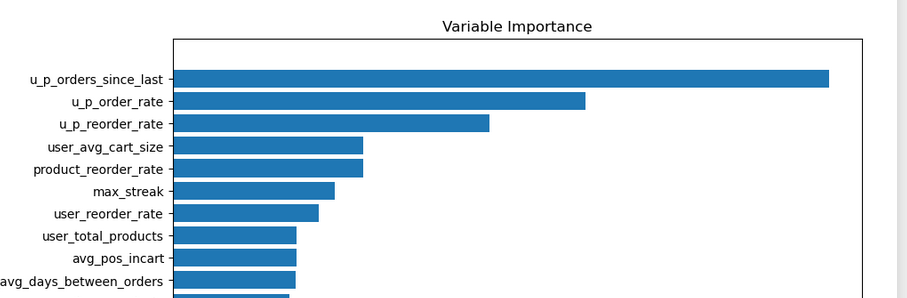

Using the best parameter recommendation Random Forest Classifier method is trained and tested on data. 

Accuracy of this model is 90 % and precision is 61%

   * TP 17,492 i.e. The numbe rof isntances that were correctly predicted as positive
   * TN 753534 - were correctly predicted as negative
   * FP 65390 - were incorrectly predicted as positive
   * FN 11051 - were incorrectly predicted as negative

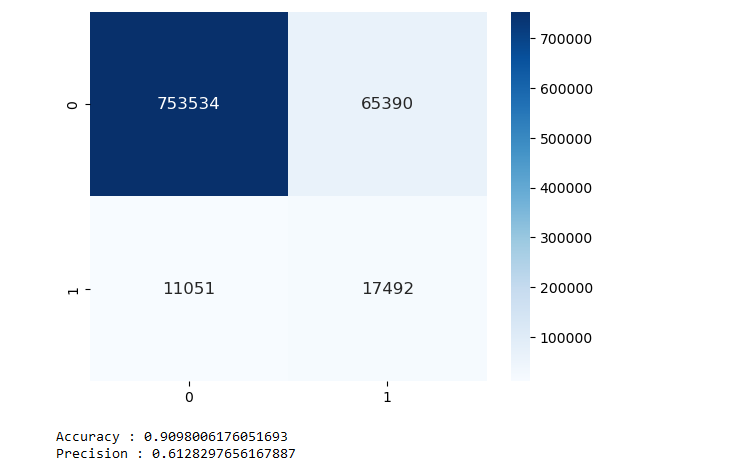


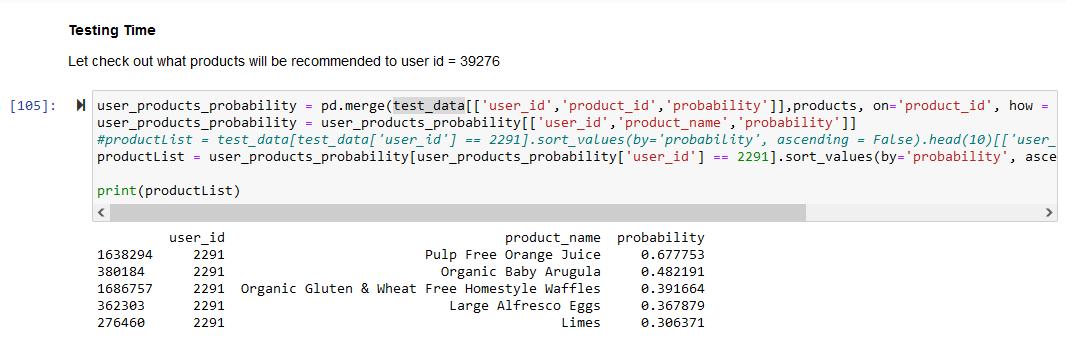

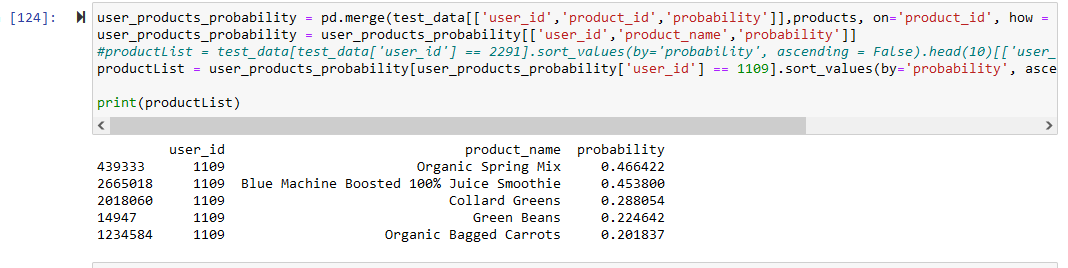

### Training data based on XGBoost algorithm


#### Feature Importance as per XGBoost Algorithm
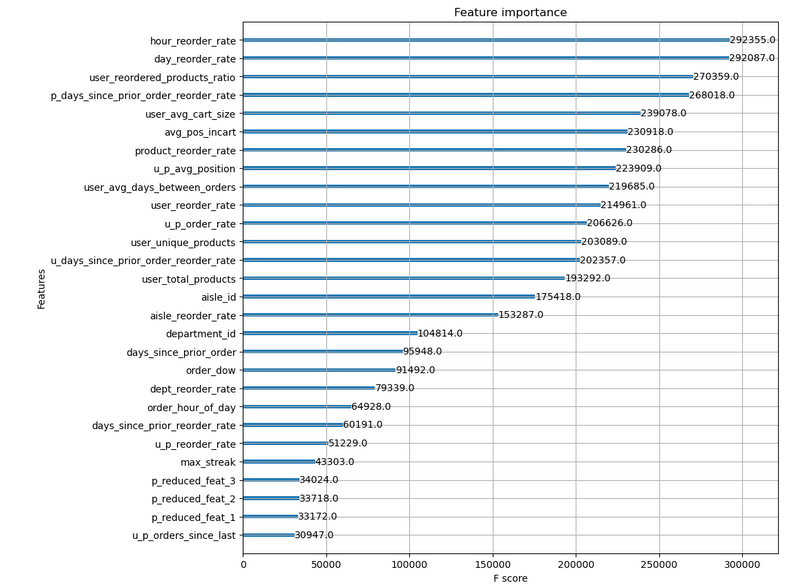

##### Accuracy score for XGBoost Algorithm
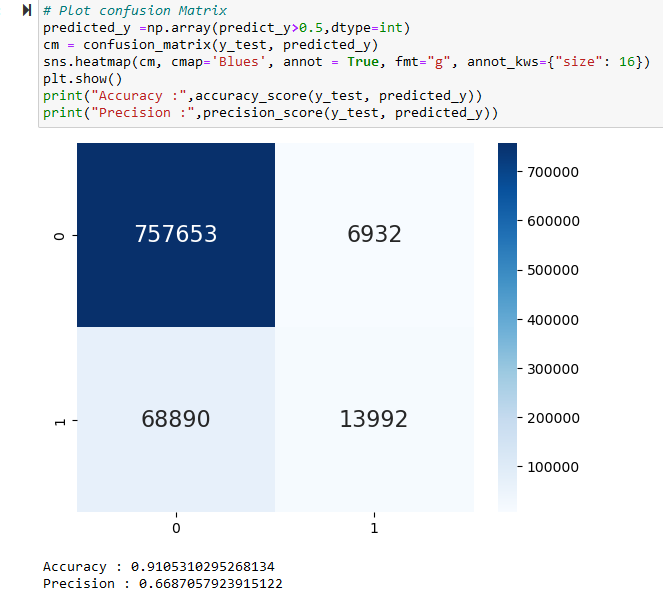

##### Testing time 
 Lets see what XGBoost algorithm with recommend for users 1109 and 2291
 
 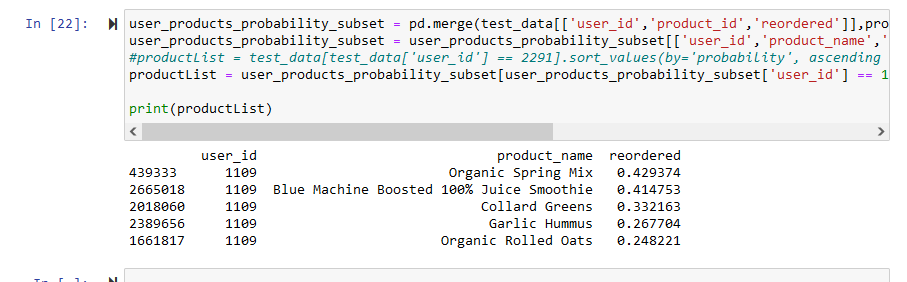
 
 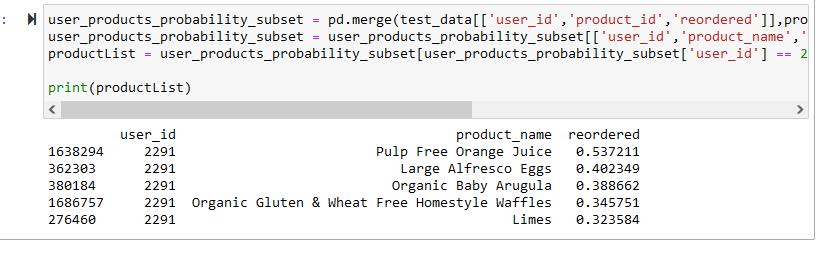

Between two algorithms, Random Forest and XGBoost, product recommendation is  similar with slight different probabilities of ordering 


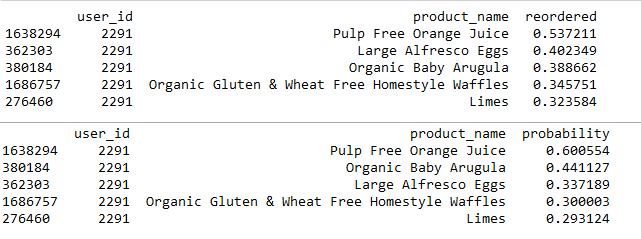

In [22]:
def final(X = None ,version = 3):

    # version 3  model has default threshold of 0.5
    #verson 4 model has best threadh hold value of 0.27
    user_id = int(X['user_id'])    
    data = pd.HDFStore("Data_v1.h5")
    train_data = data['train']
    test_data = data['test']
    merged_data = pd.concat([train_data, test_data], ignore_index=True)
    if user_id not in merged_data['user_id'].values:
        top = pd.read_pickle('top10_products.pkl')
        now = datetime.now()
         # dd/mm/YY H:M:S
        dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
        today = int(dt_string.split("/")[0])
        order_hour_of_day = int(dt_string.split(" ")[1].split(":")[0]) #current date
        order_dow = datetime.today().weekday()
        top_products = top[(top['order_dow']==order_dow) & (top['order_hour_of_day']==order_hour_of_day)]['product_name'].values.tolist()
        predictions={}
        predictions['recommend'] =  top_products
        print("*"*20) 
        print("       new user     ")
        print("*"*20) 
        del top,now, today, dt_string, order_dow, order_hour_of_day
        return predictions
   
    if version == 3:
        with open("xgb_v3.pkl","rb") as f:
             model = pickle.load(f)
    else:
        with open("xgb_v4.pkl","rb") as f:
             model = pickle.load(f)
    featurized_data = merged_data[merged_data['user_id'] == X['user_id']]
    data = featurized_data.drop(['user_id','product_id','reordered','order_id'], axis = 1)
    d_data = xgb.DMatrix(data)
    ypred = model.predict(d_data)
    
    featurized_data['reordered'] = ypred
    
    products  = pd.read_csv('../data/products.csv')
    user_products_probability_subset = pd.merge(featurized_data[['user_id','product_id','reordered']],products, on='product_id', how = 'inner')
    user_products_probability_subset = user_products_probability_subset[['user_id','product_name','reordered']]
    productList = user_products_probability_subset.sort_values(by='reordered', ascending = False)['product_name'].head(5).tolist()
    predictions={} 
    predictions['recommend'] =  productList #['product_name']
    #predictions['probability'] =  productList['reordered'].tolist()
    return predictions

In [12]:
X = {}
X['user_id'] = 999999
recommended_products = final(X)
print()
print("="*20)
print("Recommended products")
print("="*20)
for product in recommended_products['recommend']:
    print(product)

NEW uyser valldflasdfasdfas
********************
       new user     
********************

Recommended products
Banana
Bag of Organic Bananas
Organic Strawberries
Organic Baby Spinach
Organic Hass Avocado
Organic Avocado
Large Lemon
Limes
Strawberries
Organic Raspberries


In [23]:
X = {}
X['user_id'] = 1109
recommended_products = final(X)
print()
print("="*20)
print("Recommended products")
print("="*20)
for product in recommended_products['recommend']:
    #print(product['recommend'])    
    print(product)

C:\Users\Pallavi\AppData\Local\Temp\ipykernel_20308\2059034636.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featurized_data['reordered'] = ypred



Recommended products
Organic Spring Mix
Blue Machine Boosted 100% Juice Smoothie
Collard Greens
Garlic Hummus
Organic Rolled Oats


In [4]:
X = {}
X['user_id'] = 1109
recommended_products = final(X,4)
print()
print("="*20)
print("Recommended products")
print("="*20)
for product in recommended_products['recommend']:
    print(product)

C:\Users\Pallavi\AppData\Local\Temp\ipykernel_20308\262869340.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featurized_data['reordered'] = ypred



Recommended products
Organic Spring Mix
Blue Machine Boosted 100% Juice Smoothie
Collard Greens
Garlic Hummus
Organic Rolled Oats
